In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

opportunity = pd.read_csv('<SampleReportDownloaded.csv>').dropna()

In [23]:
lead_source = opportunity.groupby('Lead Source').mean()['Won']
counts = opportunity.groupby('Lead Source').count()['Won'].sort_values(ascending=False)
lead_source = lead_source.reindex(counts.index.values)
lead_source
plt.rcParams['figure.figsize'] = (15,6)

In [24]:
opportunity['Field Sales'] = (opportunity['Lead Source']=='Field Sales')
opportunity['Reseller'] = (opportunity['Lead Source']=='Reseller')
opportunity['Telesales'] = (opportunity['Lead Source']=='Telesales')
opportunity['Other'] = (opportunity['Lead Source']=='Other')
opportunity['Telecoverage'] = (opportunity['Lead Source']=='Telecoverage')

<BarContainer object of 5 artists>

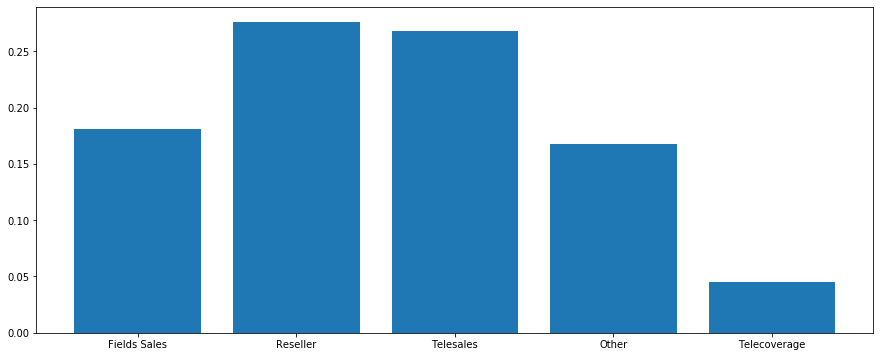

In [25]:
plt.bar(lead_source.index.values, lead_source)

<BarContainer object of 2 artists>

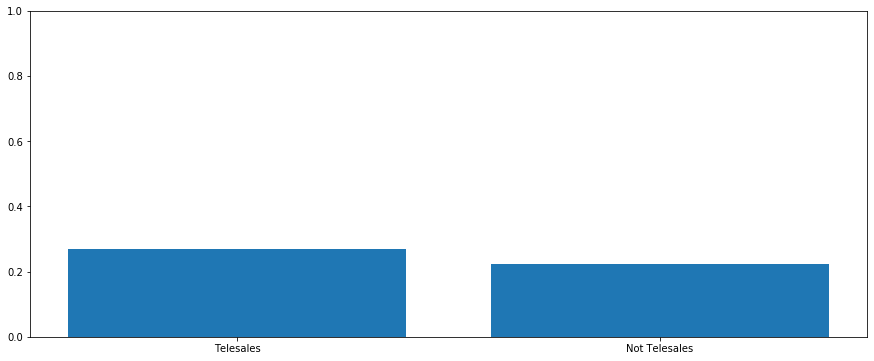

In [26]:
plt.ylim(0, 1)
plt.bar(['Telesales', 'Not Telesales'], \
        [np.mean(opportunity[(opportunity['Lead Source']=='Telesales')]['Won']), \
        np.mean(opportunity[(opportunity['Lead Source']!='Telesales')]['Won'])])

In [27]:
round(stats.ttest_ind(opportunity[(opportunity['Lead Source']=='Telesales')]['Won'], \
                opportunity[(opportunity['Lead Source']!='Telesales')]['Won'], \
                equal_var = False).pvalue, 4)

0.2058

<BarContainer object of 5 artists>

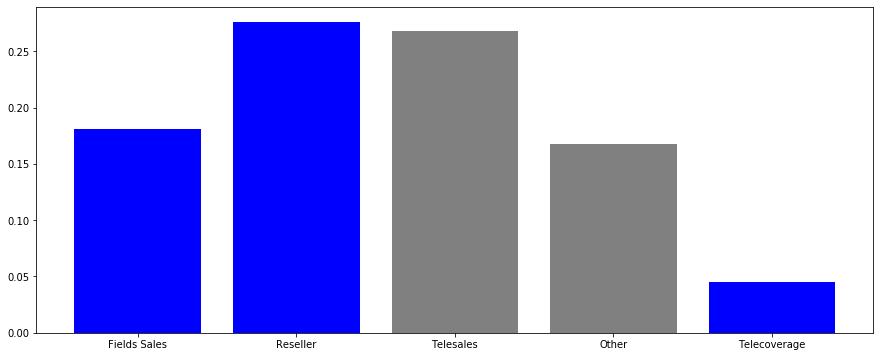

In [28]:
test_results = []
colors = []
for i in range(len(lead_source)):
    test_results = np.append(test_results,
                            stats.ttest_ind(opportunity[(opportunity['Lead Source']==lead_source.index.values[i])]['Won'],
                                            opportunity[(opportunity['Lead Source']!=lead_source.index.values[i])]['Won'],
                                            equal_var = False)[1])
    if test_results[i] < .01: 
        temp = "blue" 
    else:
        temp = "grey"
    colors = np.append(colors, temp)
plt.bar(lead_source.index.values, lead_source, color = colors)